In [1]:
#Context
#This dataset contains physicochemical properties of red wine samples and a quality score (given by human tasters).

In [2]:
#Features in the dataset:
#Each row represents a wine sample with the following columns:
#Feature	                                       Description
#fixed acidity	                               Tartaric acid content
#volatile acidity	                           Acetic acid content (vinegar smell)
#citric acid	                               Adds freshness and flavor
#residual sugar	                               Sugar left after fermentation
#chlorides	                                   Salt content
#free sulfur dioxide	                       SO₂ not bound to other molecules (antimicrobial)
#total sulfur dioxide	                       Sum of bound and free SO₂
#density	                                   Density of the wine
#pH	                                           Acidity/basicity
#sulphates	                                   Adds flavor and protects against microbes
#alcohol	                                   Alcohol percentage
#quality	                                   Quality score (0–10) rated by tasters

In [3]:
#I have downloaded this dataset from kaggle website.

In [4]:
#Case Study: Supervised Machine Learning Classification
#Objective:
#Predict whether a wine quality is "good" or "bad" based on its chemical properties using a classification algorithm.

#It was clearly mentioned,if the wine quality is less than 6, it is considered "bad." and if the wine quality is greater than 
#or equal to 6, it is considered "good.

In [5]:
import os
os.getcwd()

'C:\\Users\\GOVIND GADHAVI\\Desktop\\Data Science Notes\\Machine Learning\\Projects'

In [6]:
#importing basic library's 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading dataset
df=pd.read_csv('winequality-red.csv')

In [8]:
#Checking the number of rows and columns in dataset
df.shape

(1599, 12)

In [ ]:
#This dataset contains totals 1599 records and 12 columns including output column

In [9]:
#Loading first 5 records
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#checking output class (quality)
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
#will differenciate output column with good or bad quality, if wine quality is less then 6=bad quality and more then 6 good quality
#first create empty list
labels=[]
for i in df['quality']: #Loop through each quality value
    if i <6:
        labels.append(0)
    else:
        labels.append(1)
df['wine quality']= labels

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
#here wine quality 0 means bad and 1 means good 

In [14]:
#deleting quality columns as we have already already created wine quality column
df.drop(['quality'],axis=1,inplace=True)

In [15]:
#Check first 5 records 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [16]:
#how many samples in ouput column insuranceclaim
df['wine quality'].value_counts()

wine quality
1    855
0    744
Name: count, dtype: int64

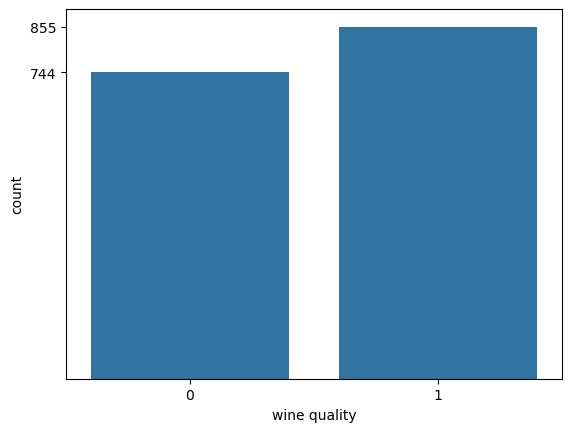

In [17]:
#Visualise using countplot 
sns.countplot(data=df,x='wine quality')
f=df['wine quality'].value_counts()
plt.yticks(f)
plt.show()

In [18]:
#The above information confirms that the output sample is balanced.

In [19]:
#Now output column is (wine quality) categorized into two classes 'good' and 'bad' we will apply the 
#Logistic Regression algorithm along with other models and evaluate their performance.

In [22]:
#Applying Exploratory Data Analysis (EDA) for dataset cleaning
#Initial step: Identify null or missing values within the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine quality            0
dtype: int64

In [23]:
#Verify by checking the data type of each column.
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine quality              int64
dtype: object

In [24]:
#All columns are of the float64 data type, and the output class column is of object type, indicating that there are no null values
#present in the dataset.

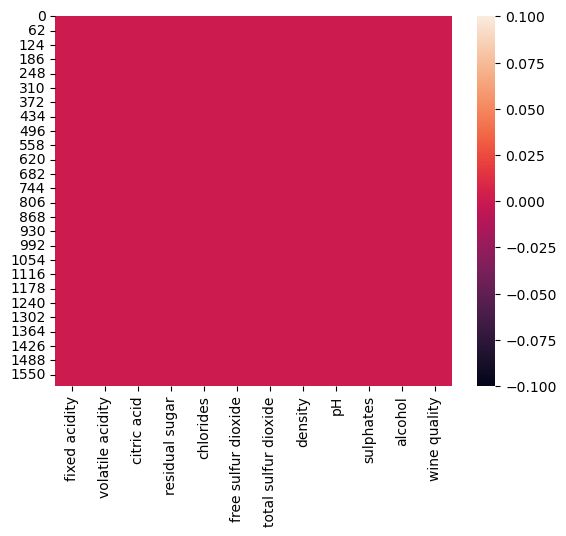

In [25]:
#Visualizing null values with a heatmap using the Seaborn library
sns.heatmap(df.isnull())
plt.show()

In [26]:
# Next step of EDA: Verifying the presence of duplicate records.
df.duplicated().sum()

240

In [27]:
#Identified 240 duplicate records within the dataset.
#TO show duplicate records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


In [28]:
#To remove duplicates record permanently
df.drop_duplicates(inplace=True)

In [29]:
#Checking duplicates
df[df.duplicated()]
#Removed duplicate rows from the dataset to make sure the data is clean and accurate. 
#Removing duplicate records is very crucial step because model can be overfitted due to duplicate records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine quality


In [30]:
#Next step of EDA: Checking for Outliers in dataset, using boxplot

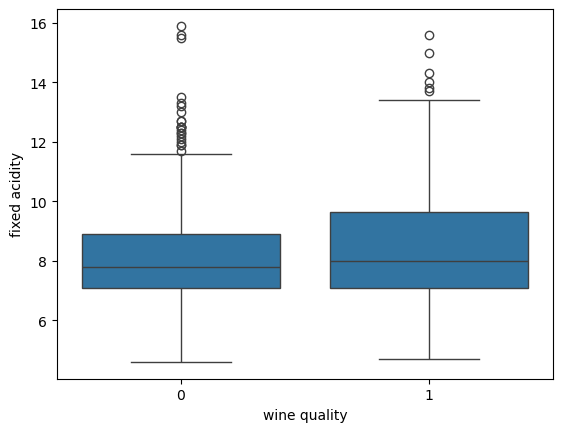

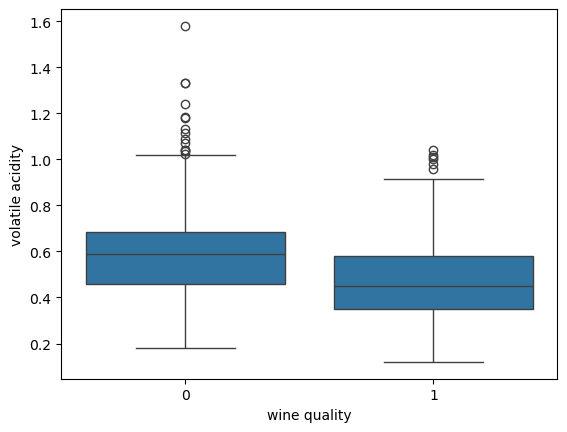

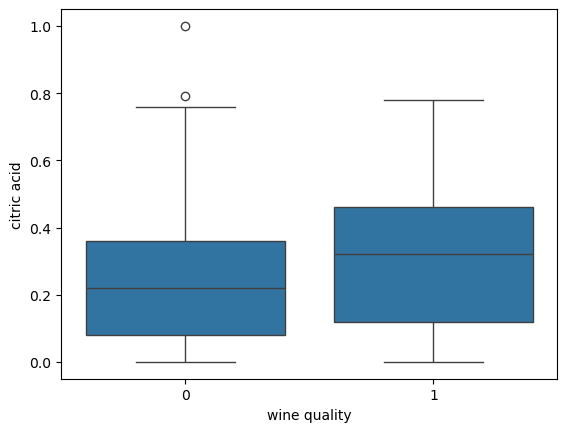

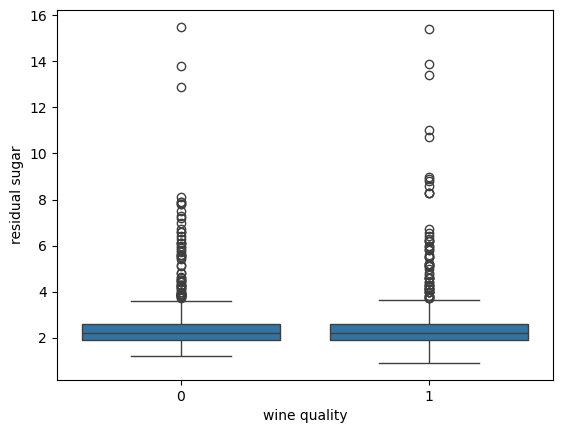

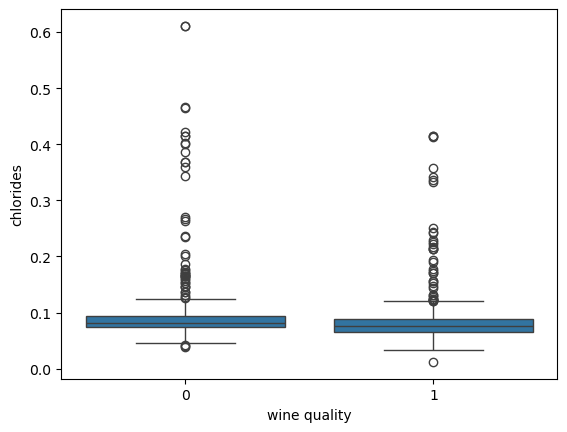

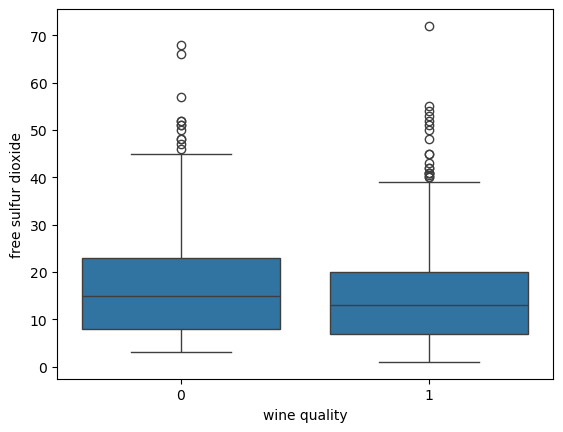

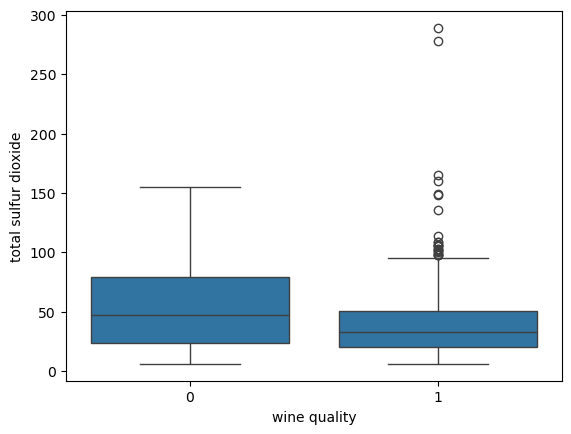

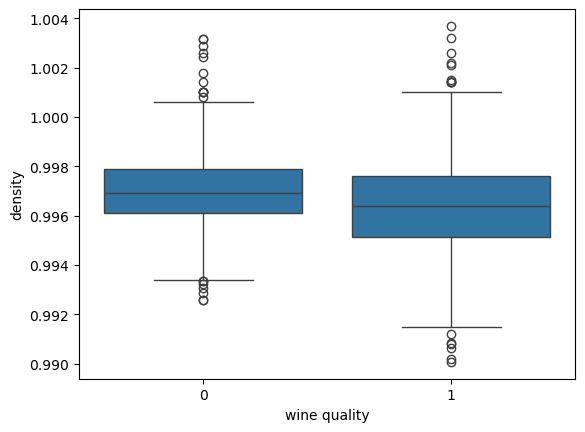

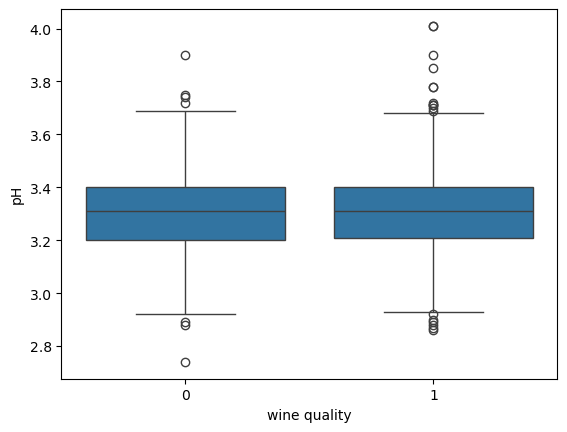

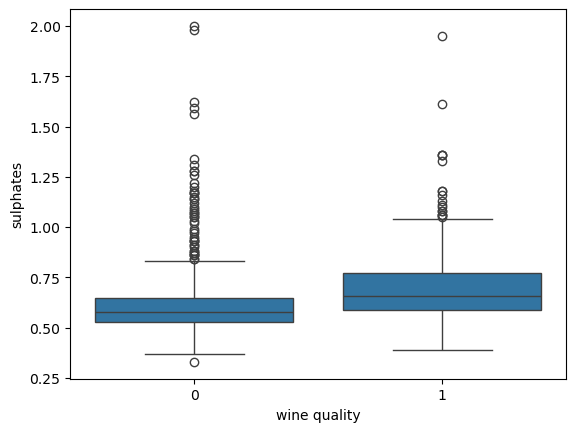

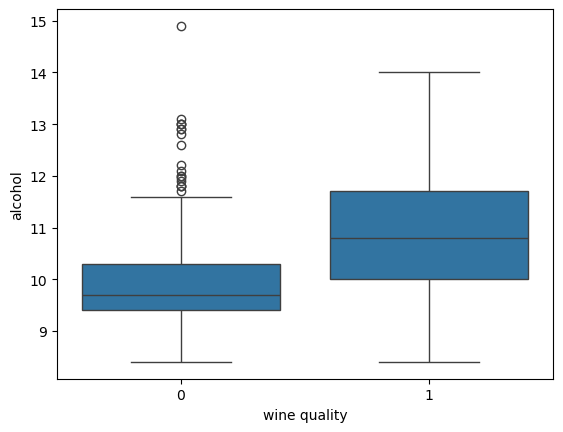

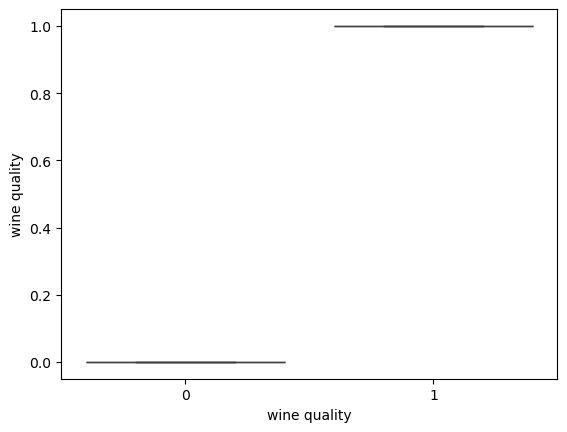

In [31]:
#Checking outliers in all continuous numeric column using using for loop
for i in df.columns:
    sns.boxplot(data=df,x='wine quality',y=i)
    plt.show()
#Will not remove the outlier due to limited domain expertise; instead, we will discuss the matter with the client concerning the outliers.

In [32]:
#Next step in EDA: processing categorical data.  
#All feature/input columns contain float64 type data, and target/output column is of int type. 
#So no need to apply LabelEncoder as every column is int and float type.
from sklearn.preprocessing import LabelEncoder  #Importing the LabelEncoder class from scikit-learn's preprocessing class

In [33]:
#now all feature/input columns are continuous numeric and output wine quality which is int type.
#creating a scatterplot using for loop on continuous numeric data(features) and wine quality (output).
#Done some analysis on the dataset

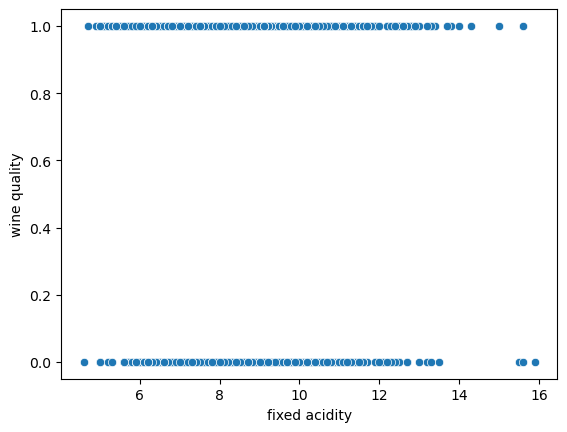

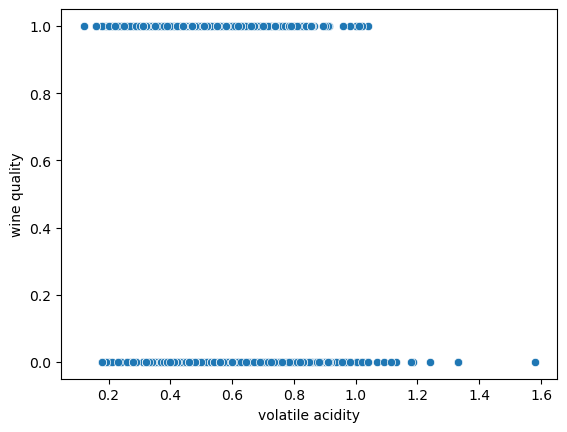

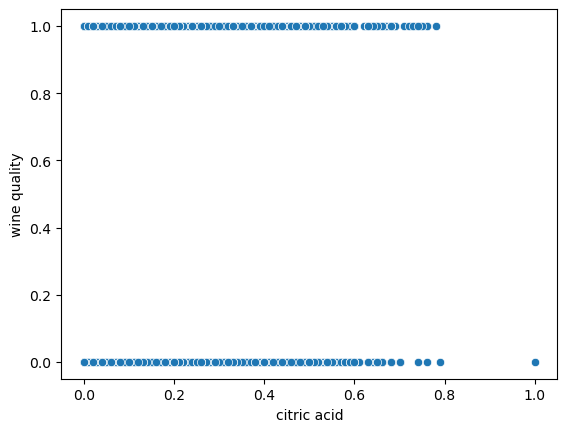

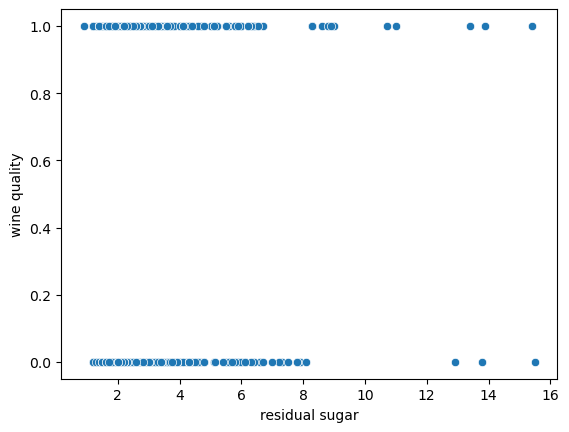

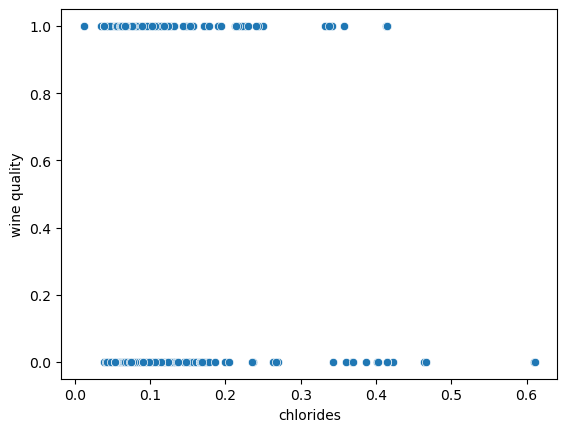

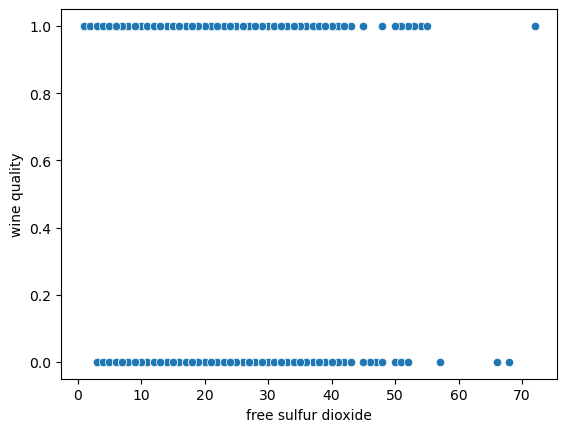

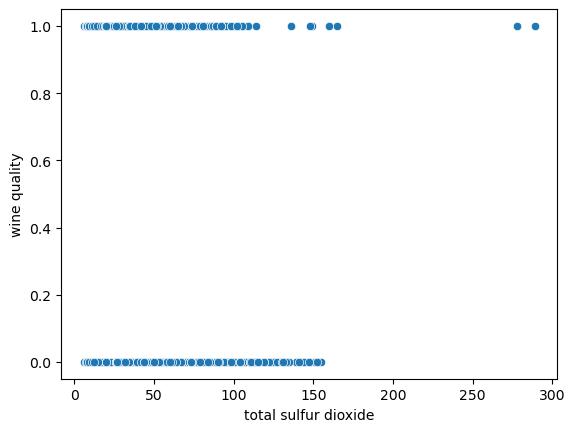

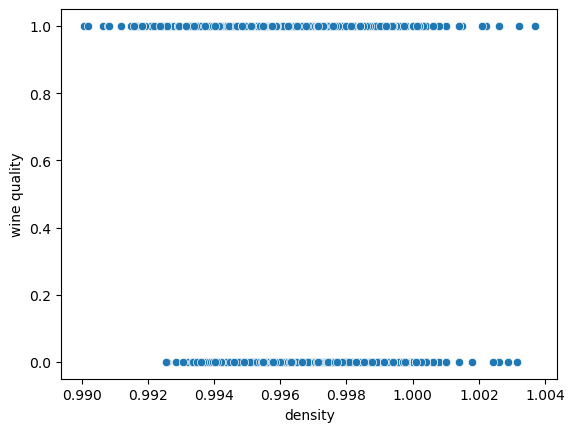

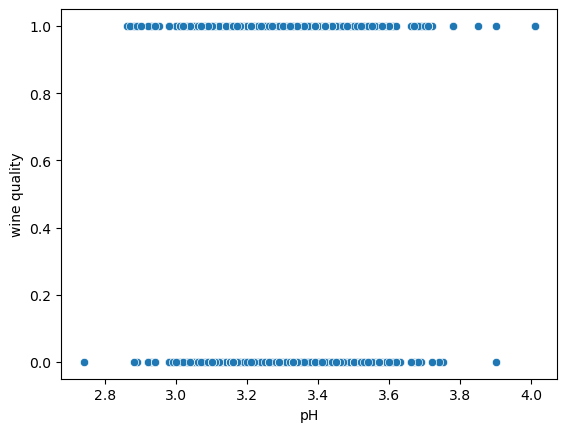

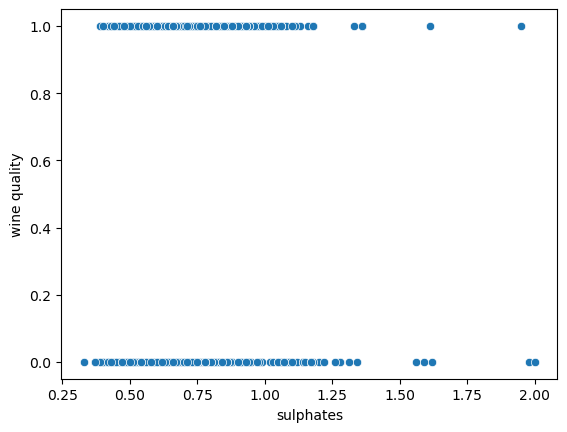

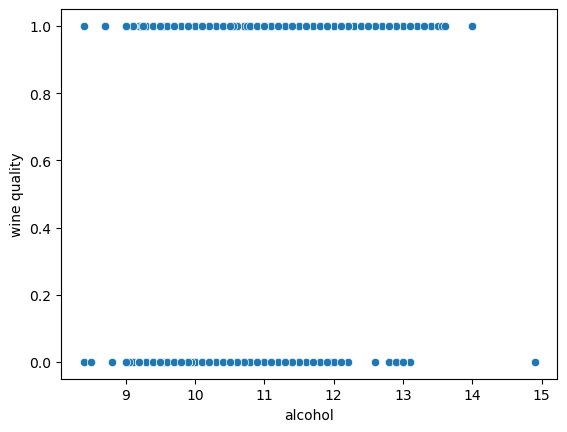

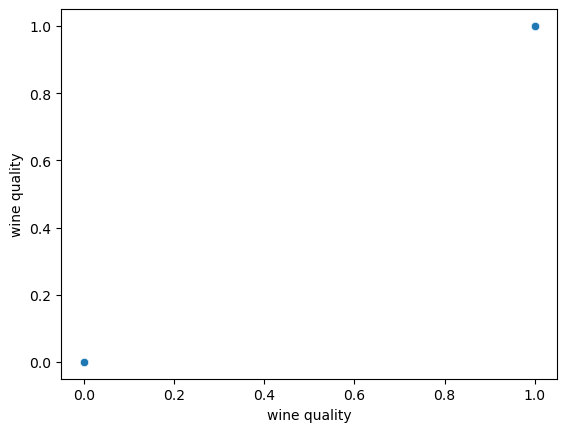

In [34]:
for i in df:
    sns.scatterplot(data=df,x=i,y='wine quality')
    plt.show()

In [35]:
#Feature                  Important Feature
#Citric Acid               Important
#Alcohol                   Important
#Chlorides                 Important
#Residual Sugar            Important
#Free Sulfur Dioxide       Less Important
#Total Sulfur Dioxide      Less Important
#Volatile Acidity          Less Important
#Density                   Not Important
#pH                        Not Important
#Sulphate                  Not Important
#Fixed acidity             Not Important

In [36]:
#seperating input and output 
x=df.drop('wine quality',axis=1) #input seperated
y=df['wine quality'] #output seperated 

In [37]:
y.value_counts()

wine quality
1    719
0    640
Name: count, dtype: int64

In [38]:
#step 6 of EDA feature scaling 
#before that we will split data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
x_train.shape,x_test.shape

((951, 11), (408, 11))

In [40]:
y_train.shape,y_test.shape

((951,), (408,))

In [41]:
#Apply StandardScaler on training input and testing input
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [42]:
x_train

array([[-0.5303845 ,  0.77331285, -0.78928573, ...,  0.54682001,
        -0.72312759, -0.86579624],
       [-1.38259614, -0.70505443, -0.73809841, ...,  2.07454948,
         0.09071186,  1.82713749],
       [-1.83710901, -0.30186335, -1.30115883, ...,  3.93439405,
        -0.22230331,  2.19857663],
       ...,
       [-0.70082683, -1.96838647,  0.84870822, ...,  0.28112793,
        -0.72312759,  1.82713749],
       [-0.24631396, -0.94696907,  0.95108284, ...,  0.28112793,
         1.28016953,  2.19857663],
       [-0.5303845 ,  0.12820713, -0.43097455, ...,  1.21105021,
         0.1533149 ,  0.0628016 ]])

In [43]:
type(x_train),x_train.ndim

(numpy.ndarray, 2)

In [44]:
type(x_test),x_test.ndim

(numpy.ndarray, 2)

In [45]:
#perform the model
#first create a function for train,test and generate report 
def create_model(model):
    #train the model with 70% input
    model.fit(x_train,y_train)
    #To test the model with 30% data, machine gives predicted output 
    y_pred=model.predict(x_test)
    #create a report 
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return model

In [46]:
#importing confusion_matrix and classification_report class 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
#perform model with the help of LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()

In [48]:
#call user defined function create_model() and passing the parameter of object of
#LogisticRegression class 
lr=create_model(lr)

[[136  53]
 [ 72 147]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.73      0.67      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.70      0.69       408
weighted avg       0.70      0.69      0.69       408



In [49]:
#In our dataset, recall score is important because if the wine quality is poor and the model incorrectly predicts 
#it as good, consumers could be exposed to potentially harmful products.

In [50]:
#The current accuracy is 0.69, which indicates a 69% correctness, and the recall is 0.67, or 67%. 
#While these scores provide some insight, they suggest that there is room for improvement when using Logistic Regression. 

#One potential reason for the performance could be that Logistic Regression does not automatically select the most relevant
#input features for prediction.

#To explore better results, we might consider trying a different classifier, such as the DecisionTreeClassifier. 
#This approach could potentially enhance the model's performance.

In [51]:
#Importing DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
#creating object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #By default criterion='gini index'

In [52]:
#calling function and passing the parameter: Object of DecisionTreeClassifier
dt=create_model(dt)

[[118  71]
 [ 71 148]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       189
           1       0.68      0.68      0.68       219

    accuracy                           0.65       408
   macro avg       0.65      0.65      0.65       408
weighted avg       0.65      0.65      0.65       408



In [53]:
dict={'Input columns':x.columns,'IG': dt.feature_importances_}
df1=pd.DataFrame(dict)
df1
df1.sort_values('IG',ascending=False,ignore_index=True)
#IG means information gain 
#use inbuilt attributes feature_importances_ which define in DecisionTreeClassifer class 
#it is used to show information gain of each input 

,Input columns,IG
0,alcohol,0.268252
1,volatile acidity,0.131584
2,total sulfur dioxide,0.104983
3,sulphates,0.088514
4,pH,0.078444
5,density,0.068720
6,chlorides,0.065197
7,fixed acidity,0.052872
8,free sulfur dioxide,0.051751
9,residual sugar,0.049399


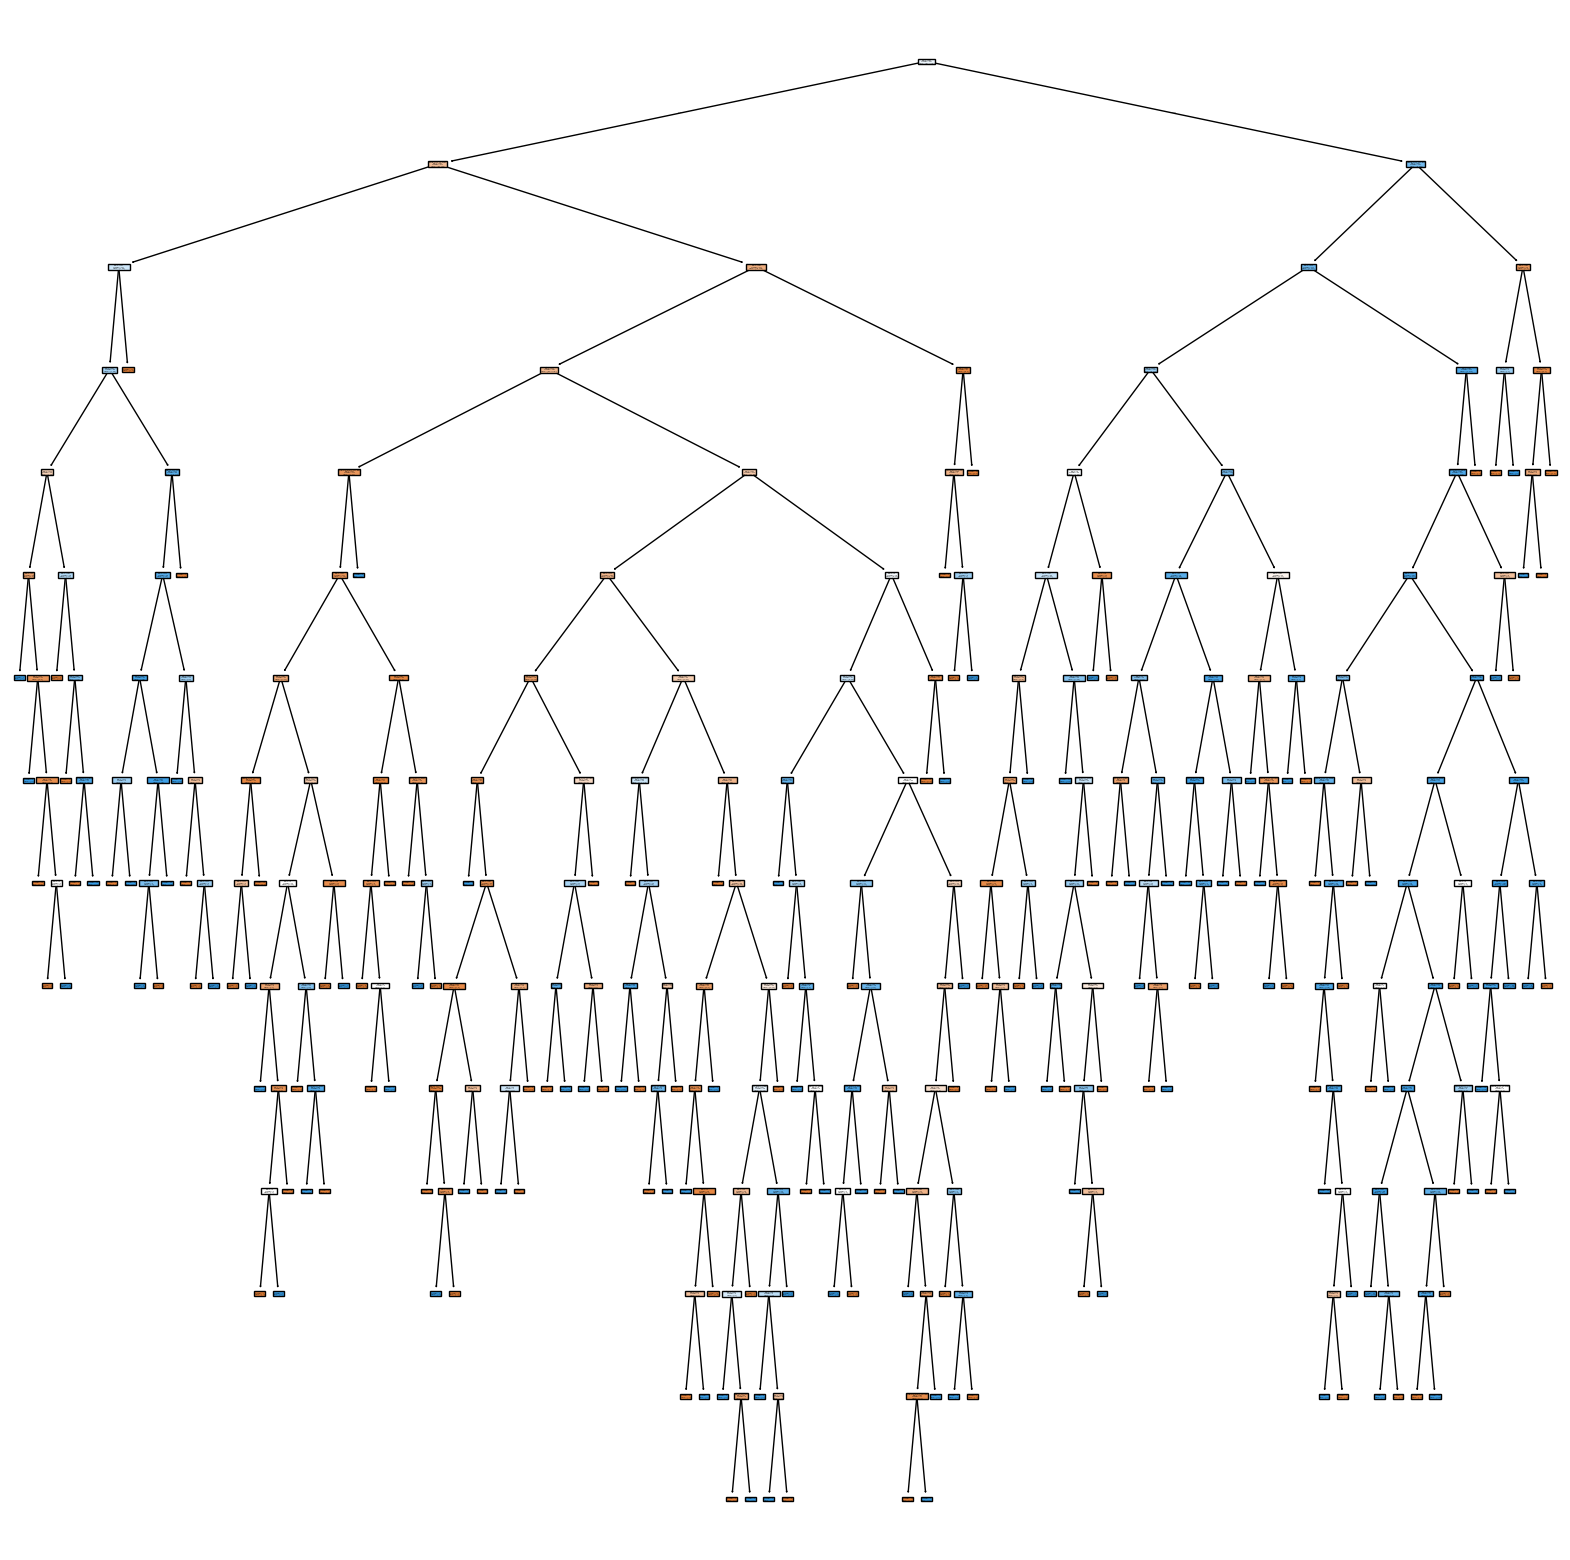

In [54]:
#Visualise tree
from sklearn import tree
#tree inbuilt class which define in sklearn package 
features=x.columns #features user definded object 
fig=plt.figure(figsize=(20,20)) #change page size
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [55]:
#Apply DecisionTreeClassifier with entropy 
#create the object of DecisionTreeClassifier class 
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy') #by default criterian='gini index'

In [56]:
#call function and passing the parameter: object of DecisionTreeClassifier class 
dt1=create_model(dt1)

[[122  67]
 [ 80 139]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       189
           1       0.67      0.63      0.65       219

    accuracy                           0.64       408
   macro avg       0.64      0.64      0.64       408
weighted avg       0.64      0.64      0.64       408



In [57]:
#here recall score is 0.63 means 63% and accuracy is 0.64 means 64%
#will apply other algorithms for better recall score and accuracy

In [58]:
#create a dictionary
dict={'Input columns':x.columns,'IG': dt1.feature_importances_}
df9=pd.DataFrame(dict)
df9.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.195464
1,volatile acidity,0.130761
2,sulphates,0.127159
3,chlorides,0.093922
4,density,0.090354
5,total sulfur dioxide,0.080668
6,pH,0.063055
7,residual sugar,0.057974
8,free sulfur dioxide,0.056560
9,fixed acidity,0.055920


In [59]:
#Limitations of DecisionTreeClassifier 
#model is overfit,
#To reduced overfit the model, use pruning technique in decisiontree
#how to reduced overfitting in model : use 2 methods:-
#1. max_depth : inbuilt parameter od DecisionTreeClassifier
#2. min_samples_leaf : inbuilt parameters of DecisionTreeClassifier

In [60]:
#max_depth: max_depth cannot be more than 8 in any dataset.
#create the object of DecisionTreeClassifier class and passing the parameter max_depth

#use hit and trial method : use for loop 
'''
for i in range(1,9): #start i=1 stop=9-1=8 step=+1
    dt2=DecisionTreeClassifier (random_state=1,max_depth=i)
    #here i=1 then i=2 then i=3 and so on
    print("Max Depth:",i)
    #call function and passing the object DecisionTreeClassifier class as a argument
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,max_depth=2) #by default gini index
#call function and passing the object of DecisionTreeClassifier class as a argument 
dt2=create_model(dt2)


[[125  64]
 [ 65 154]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       189
           1       0.71      0.70      0.70       219

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.68      0.68      0.68       408



In [61]:
#create dictionary
dict={'Input columns':x.columns,'IG':dt2.feature_importances_ }
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.759024
1,volatile acidity,0.240976
2,fixed acidity,0.000000
3,citric acid,0.000000
4,residual sugar,0.000000
5,chlorides,0.000000
6,free sulfur dioxide,0.000000
7,total sulfur dioxide,0.000000
8,density,0.000000
9,pH,0.000000


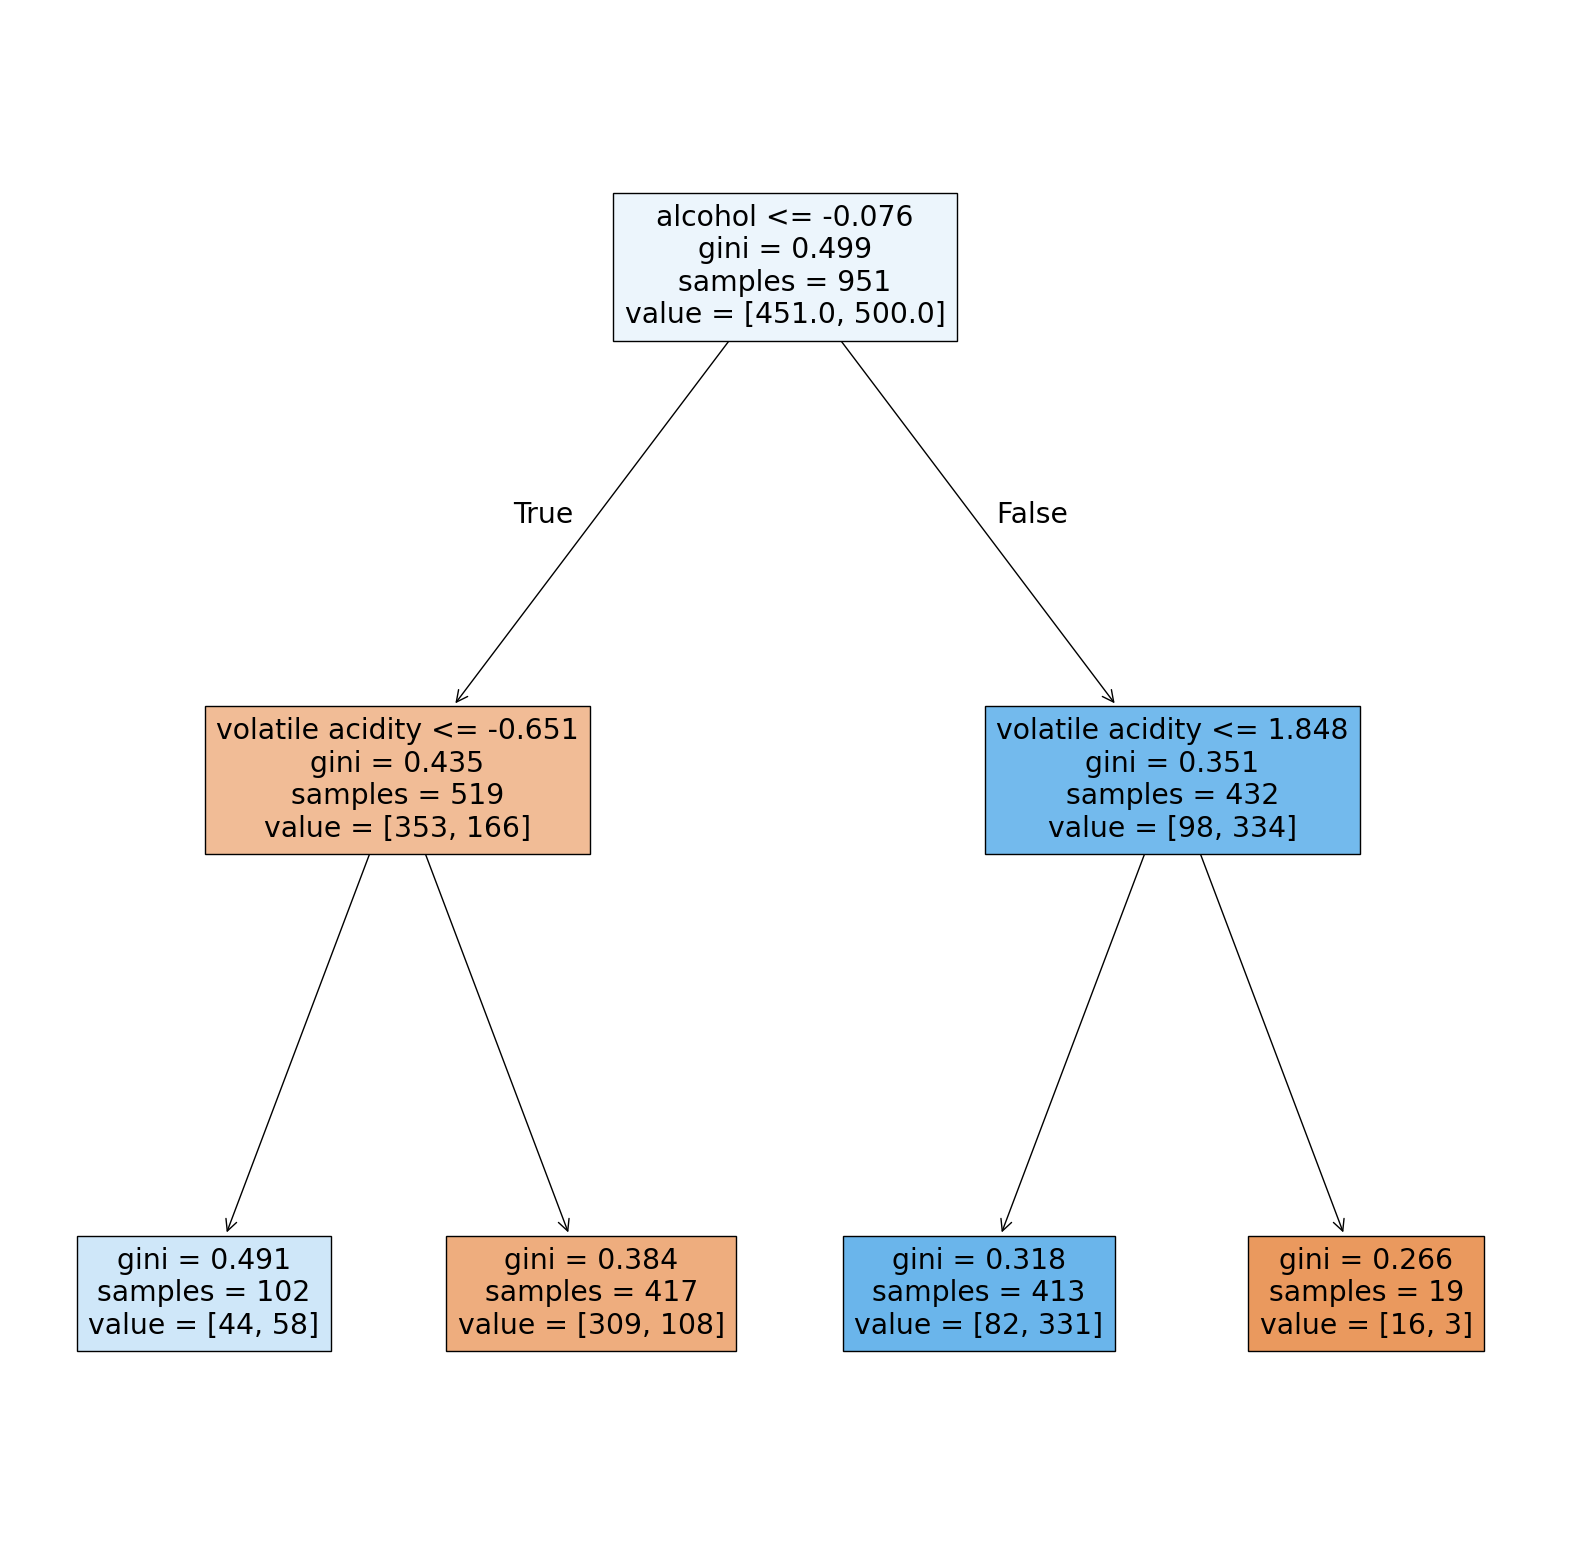

In [62]:
features=x.columns #features user definded object 
fig=plt.figure(figsize=(20,20)) #change page size
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [63]:
#here : max_depth :
#recall score= 70% and accuracy=68%

In [64]:
#entropy with max_depth: to reduce overfitting of model
'''
for i in range(1,9): #start i=1 stop=9-1=8 step=+1
    dt2=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    #here i=1 then i=2 then i=3 and so on
    print("Max Depth:",i)
    #call function and passing the object DecisionTreeClassifier class as a argument
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
#here i=1 then i=2 then i=3 and so on
print("Max Depth:",i)
#call function and passing the object DecisionTreeClassifier class as a argument
dt2=create_model(dt2)

Max Depth: wine quality
[[114  75]
 [ 64 155]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       189
           1       0.67      0.71      0.69       219

    accuracy                           0.66       408
   macro avg       0.66      0.66      0.66       408
weighted avg       0.66      0.66      0.66       408



In [65]:
#create dictionary
dict={'Input columns':x.columns,'IG':dt2.feature_importances_ }
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.552691
1,volatile acidity,0.169793
2,total sulfur dioxide,0.166836
3,sulphates,0.110680
4,fixed acidity,0.000000
5,citric acid,0.000000
6,residual sugar,0.000000
7,chlorides,0.000000
8,free sulfur dioxide,0.000000
9,density,0.000000


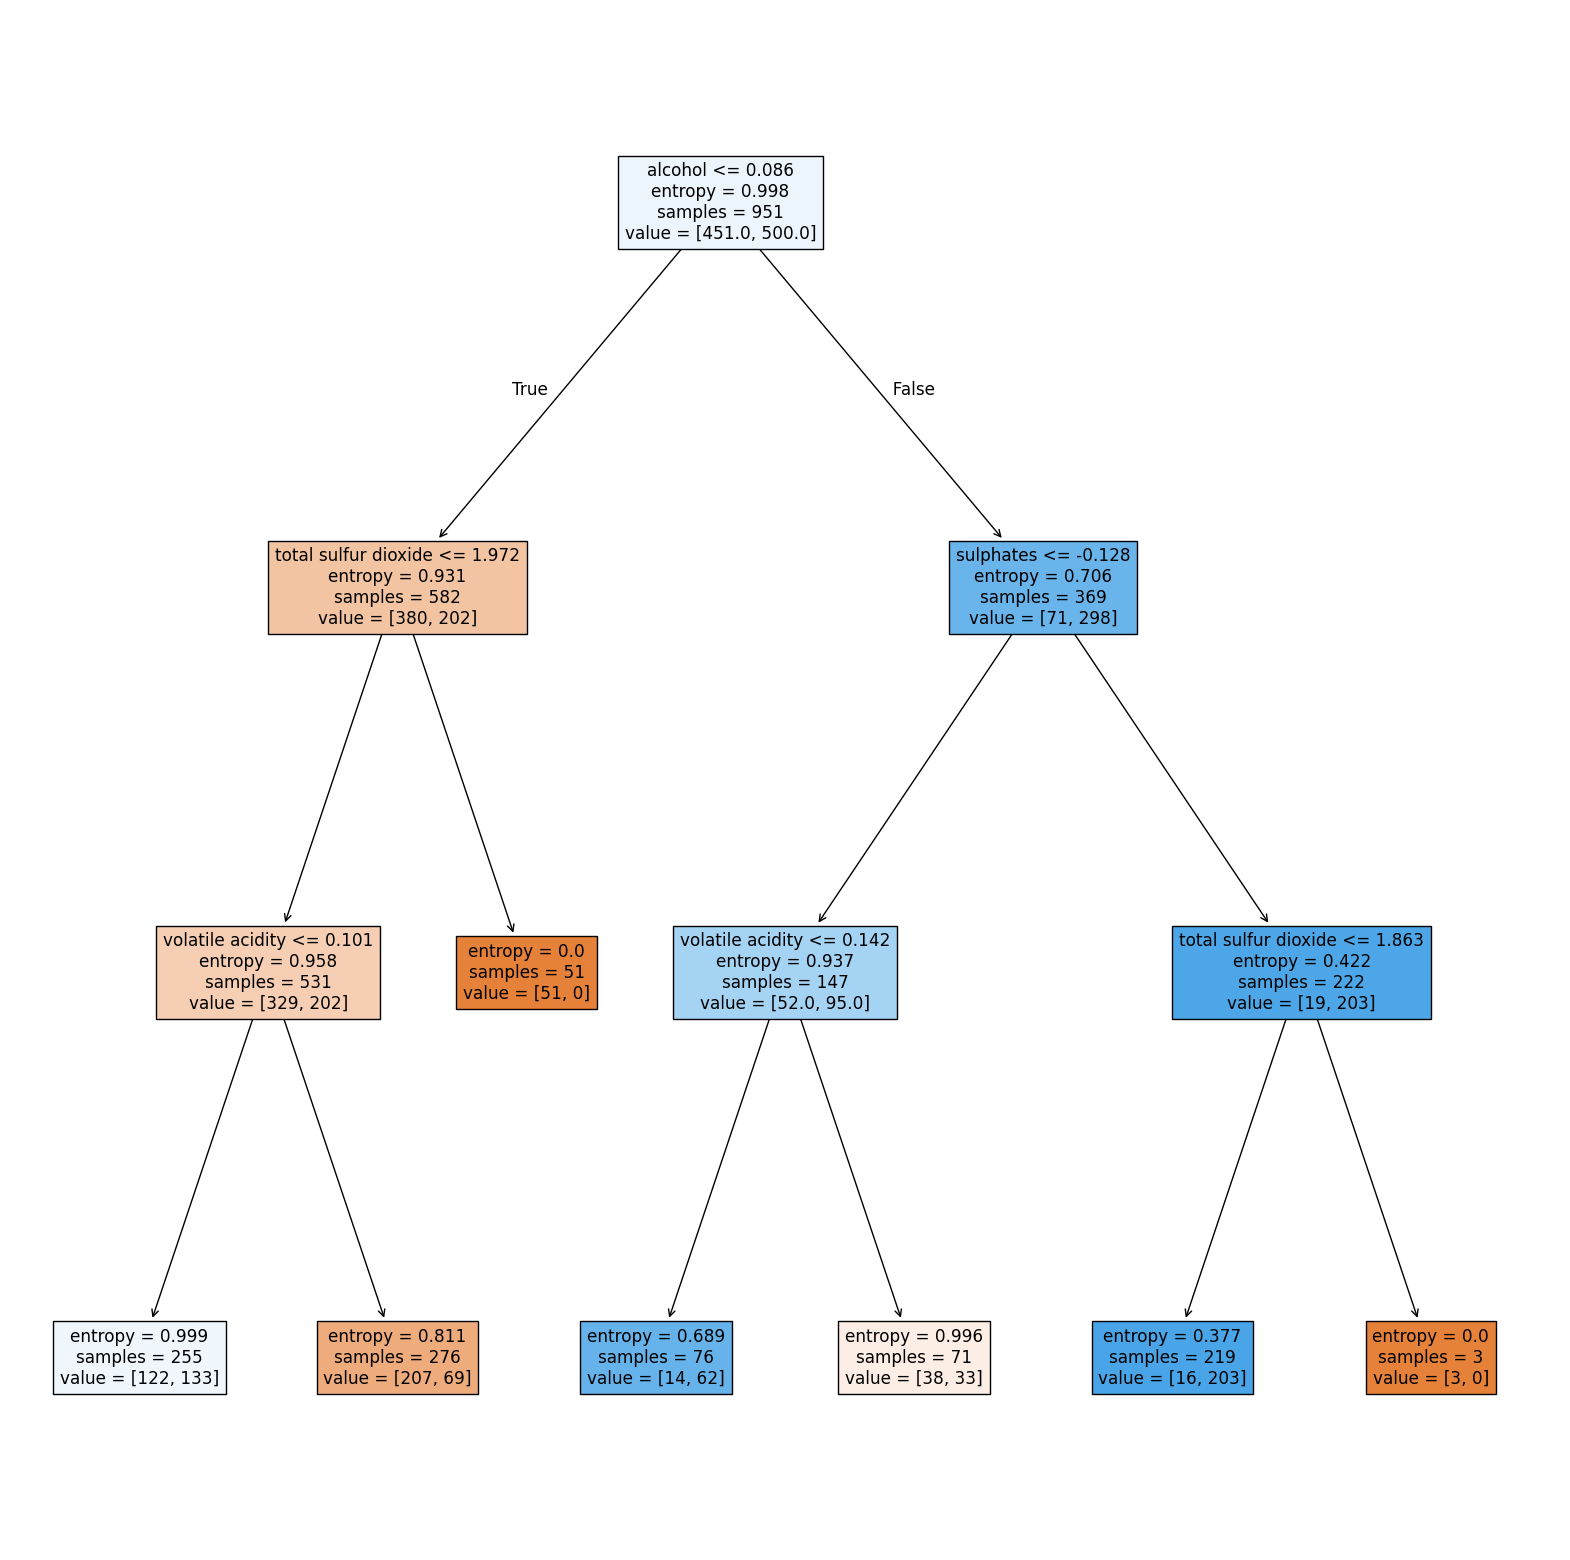

In [66]:
features=x.columns #features user definded object 
fig=plt.figure(figsize=(20,20)) #change page size
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [67]:
#Conclusion: max_depth=5 with Gini index is better than max_depth=6 with entropy
#max_depth with gini index: recall score=70% and accuracy=68% 
#max_depth with entropy : recall score=71% and accuracy=66%

In [68]:
#Second Pruning Technique : To reduce overfitting of model using DecisionTreeClassifier 
#min_samples_leaf : inbuilt parameter of DecisionTreeClassifier class 
#leaf means no any child 

#min samples_leaf>=45 and min_samples_leaf<=100

In [69]:
'''
for i in range(45,101): #start=45, stop 101-1=100 step=+1
    #create thee object of DecisionTreeClassifier class and passing the parameter
    #min_samples_leaf=i use gini index
    dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #by default gini index
    print('min samples leaf:',i)
    #call function
    dt3=create_model(dt3)
'''
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=51) #by default gini index
#call function
dt3=create_model(dt3)

[[125  64]
 [ 57 162]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       189
           1       0.72      0.74      0.73       219

    accuracy                           0.70       408
   macro avg       0.70      0.70      0.70       408
weighted avg       0.70      0.70      0.70       408



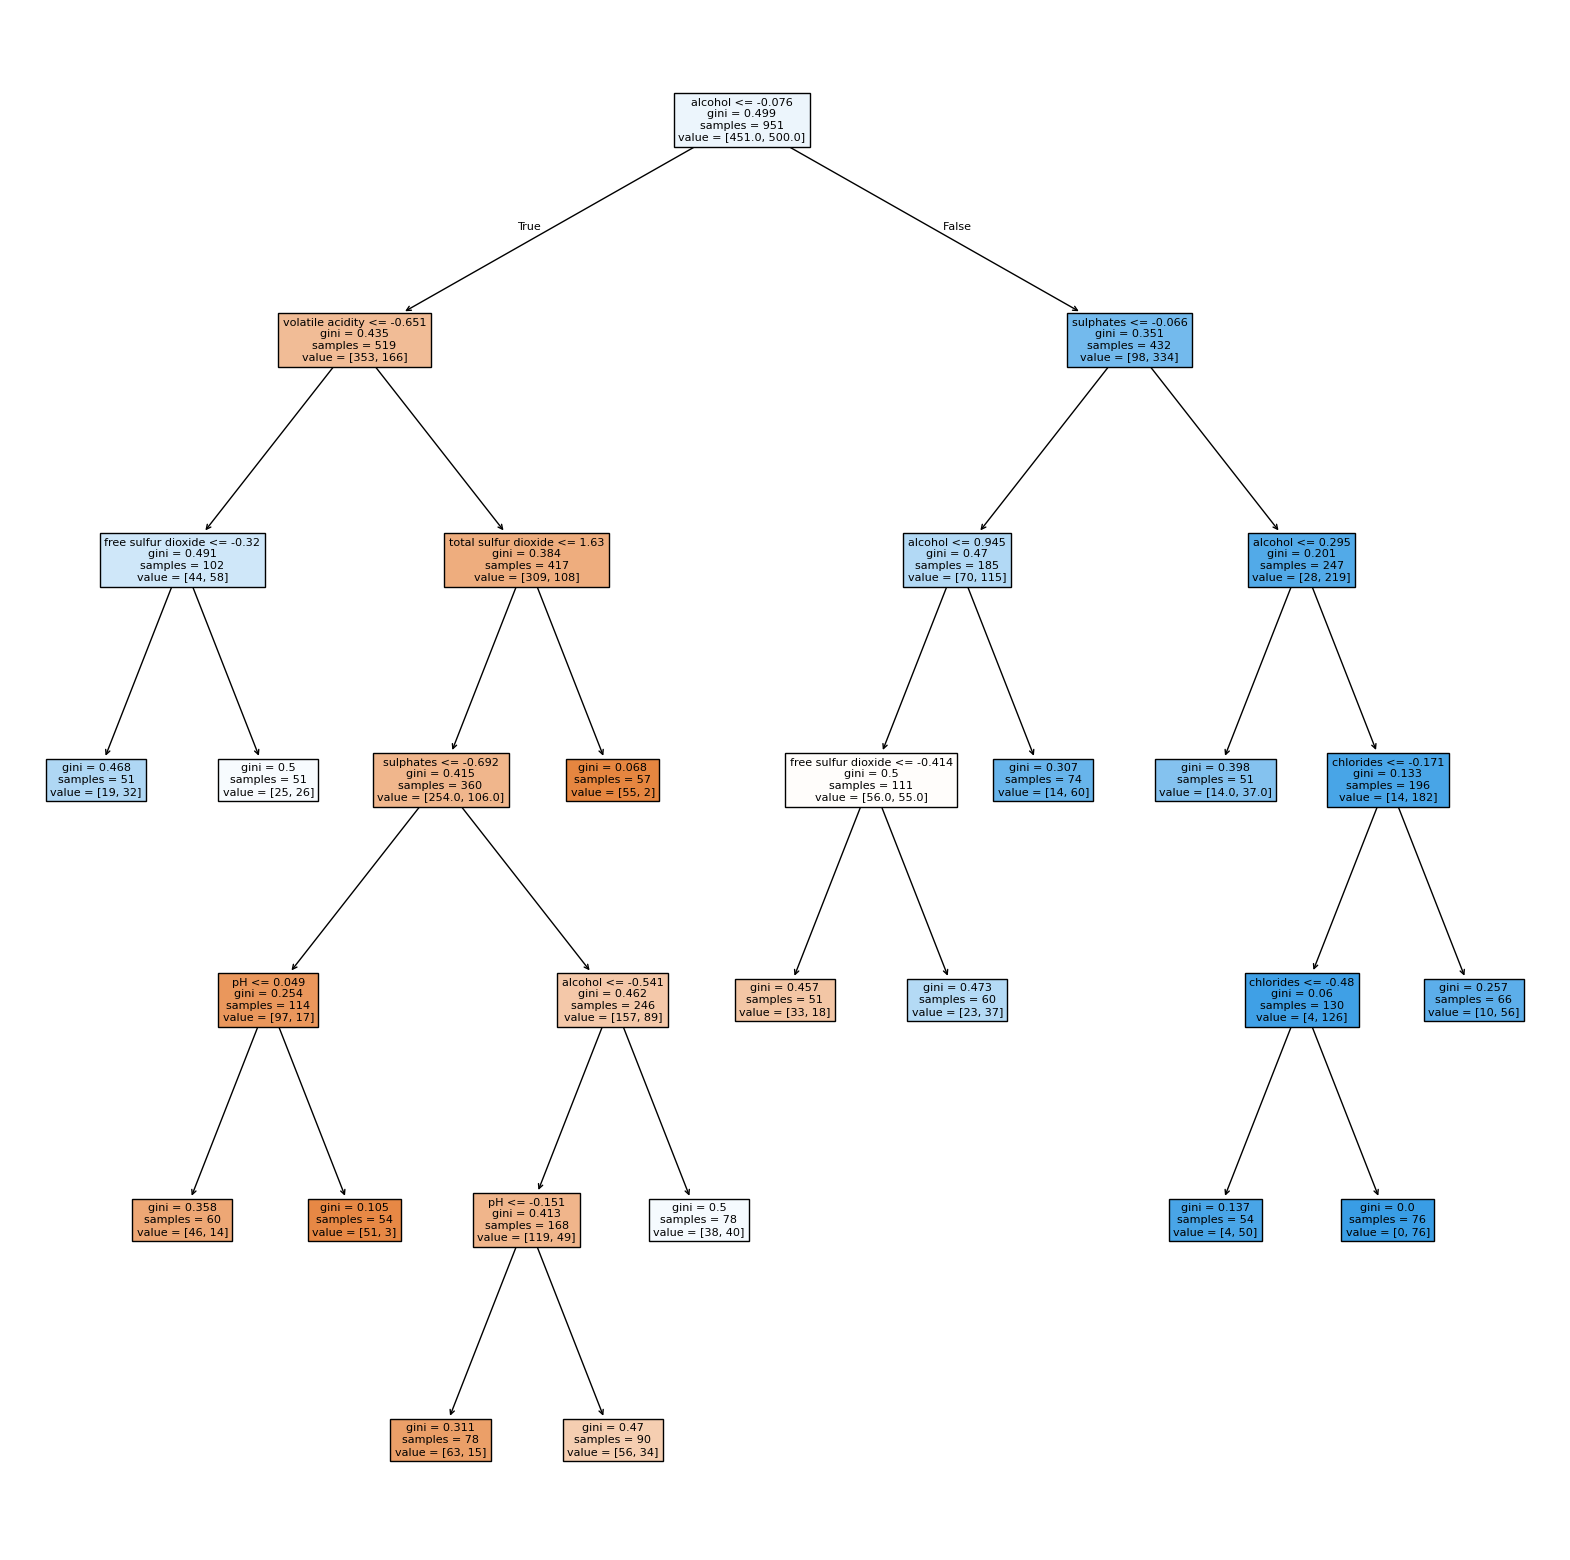

In [70]:
features=x.columns #features user definded object 
fig=plt.figure(figsize=(20,20)) #change page size
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [71]:
#create dictionary
dict={'Input columns':x.columns,'IG':dt3.feature_importances_ }
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.674775
1,sulphates,0.129352
2,volatile acidity,0.092798
3,total sulfur dioxide,0.039094
4,pH,0.027585
5,free sulfur dioxide,0.026813
6,chlorides,0.009584
7,fixed acidity,0.000000
8,citric acid,0.000000
9,residual sugar,0.000000


In [72]:
#min_samples_leaf with entropy
'''
for i in range(45,101): #start=45, stop 101-1=100 step=+1
    #create thee object of DecisionTreeClassifier class and passing the parameter
    #min_samples_leaf=i use gini index
    dt3=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i) #by default gini index
    print('min samples leaf:',i)
    #call function
    dt3=create_model(dt3)
'''
dt3=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=73) #by default gini index
#call function
dt3=create_model(dt3)

[[128  61]
 [ 77 142]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       189
           1       0.70      0.65      0.67       219

    accuracy                           0.66       408
   macro avg       0.66      0.66      0.66       408
weighted avg       0.66      0.66      0.66       408



In [73]:
#create dictionary
dict={'Input columns':x.columns,'IG':dt3.feature_importances_ }
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.585969
1,sulphates,0.245431
2,volatile acidity,0.110511
3,density,0.036436
4,pH,0.021653
5,fixed acidity,0.000000
6,citric acid,0.000000
7,residual sugar,0.000000
8,chlorides,0.000000
9,free sulfur dioxide,0.000000


In [74]:
#min_samples_leaf with gini index depth= 51 : accoracy: 70% and recall score=74%  
#min_samples_leaf with entropy depth=73: accuracy : 66% and recall score=65%

#max_depth with gini index depth=2: recall score=70% and accuracy=68% 
#max_depth with entropy depth=3 : recall score=71% and accuracy=66%

#As of now best score is from min_samples_leaf with gini index depth= 51 : accoracy: 70% and recall score=74%  
#got highest score compare as other algorithm 

In [75]:
#Will apply Ensembling Technique on the dataset 

In [76]:
#ensemble inbuilt outer class--> RandomForestClassifier inbuilt inner class-->fit() predict() confusion_matrix() 
#and classification_report
from sklearn.ensemble import RandomForestClassifier 

In [77]:
#RandomForestClassifier : train data from many decisiontree
#Atleast 10 decisiontree and max 100 decision tree
#use hit and trail method
'''
for i in range(10,101): #start i=10 stop=101-1=100 step=+1
    #create the object of RandomForestClassifier class and passing the parameter 
    rfc=RandomForestClassifier(random_state=1,n_estimators=i) #by default gini index 
    #n_estimators means number of decision tree 
    print('No of decision:',i)
    #call function
    rfc=create_model(rfc)
'''
#create the object of RandomForestClassifier class and passing the parameter 
rfc=RandomForestClassifier(random_state=1,n_estimators=19) #by default gini index 
#call function
rfc=create_model(rfc)

[[125  64]
 [ 58 161]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       189
           1       0.72      0.74      0.73       219

    accuracy                           0.70       408
   macro avg       0.70      0.70      0.70       408
weighted avg       0.70      0.70      0.70       408



In [78]:
#create dictionary
dict={'Input columns':x.columns,'IG':rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.196508
1,sulphates,0.136869
2,volatile acidity,0.124788
3,total sulfur dioxide,0.091312
4,density,0.075621
5,chlorides,0.071883
6,pH,0.071482
7,citric acid,0.060218
8,fixed acidity,0.059953
9,free sulfur dioxide,0.057411


In [79]:
#RandomForestClassifier with entropy
'''
for i in range(10,101): #start i=10 stop=101-1=100 step=+1
    #create the object of RandomForestClassifier class and passing the parameter 
    rfc=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=i) 
    #n_estimators means number of decision tree 
    print('No of decision:',i)
    #call function
    rfc=create_model(rfc)
'''
#create the object of RandomForestClassifier class and passing the parameter 
rfc=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=19)
rfc=create_model(rfc)

[[129  60]
 [ 56 163]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       189
           1       0.73      0.74      0.74       219

    accuracy                           0.72       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.72      0.72      0.72       408



In [80]:
#create dictionary
dict={'Input columns':x.columns,'IG':rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.176837
1,sulphates,0.125888
2,volatile acidity,0.120563
3,total sulfur dioxide,0.098411
4,density,0.091927
5,pH,0.072046
6,chlorides,0.070738
7,fixed acidity,0.067868
8,citric acid,0.063119
9,residual sugar,0.057176


In [81]:
#RandomForestClassifier with gini index : accuracy= 70% and recall=74%
#RandomForestClassifier with entropy index : accuracy= 72% and recall=74%
#best algorithm in this dataset : RandomForestClassifier with entropy

In [82]:
#Applying Gradient Boost on this dataset

In [83]:
#Gradient Boost: It basically focus on short coming errors means fully grown tree

#use inbuilt inner class GradientBoostingClassifier--> inbuilt outer class ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
#take atlest 10 decisiontree and maximum 100 decision tree
#use inbuilt parameter n_estimators means no of decision tree of GradientBoostingClassifier
'''
for i in range(10,101): #start i=10 stop 101-1=100 step=+1
    #create the object of GradientBoostingClassifier class and passing the parameter 
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i) #by default gini index
    print('No of decision tree:',i)
    #call function
    gbc=create_model(gbc)
'''
gbc=GradientBoostingClassifier(random_state=1,n_estimators=90) #by default gini index
#call function
gbc=create_model(gbc)

[[134  55]
 [ 62 157]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       189
           1       0.74      0.72      0.73       219

    accuracy                           0.71       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.71      0.71      0.71       408



In [85]:
#After applying the GradientBoosting algorithm, we achieved a recall score of 72% (difference is 1%) and an accuracy of 71%. 
#We will continue to evaluate other algorithms as well.

In [86]:
#create dictionary
dict={'Input columns':x.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,alcohol,0.399214
1,volatile acidity,0.160126
2,sulphates,0.132805
3,total sulfur dioxide,0.085370
4,pH,0.051571
5,density,0.037981
6,chlorides,0.036744
7,fixed acidity,0.035002
8,residual sugar,0.028954
9,citric acid,0.019454


In [87]:
#Extreme Gradient Boost (XGB): This is advanced version of gradient boost.
#1. Multithreading Technique 
#2. It takes less memory space and fast process 
#3. It handles huge amount of data means it deals with large amount of data
#4. It handles outliers because it has inbuilt capacity 
#5. It handles automatic overfitting situation
#6. it handles null values
#Extreme gradient boost is the better version of gradient boost 

In [88]:
#install special inbuilt package: xgboost : it is open source, it is free of cost but install first time 
#!pip install xgboost

In [89]:
from xgboost import XGBClassifier 
#xgboost inbuilt package--> XGBClassifier inbuilt class -->fit(), predict(), confusion_matrix and classification_report

In [90]:
#many decisiontree: min =10 and max-100
'''
for i in range(10,101): #start i=10 stop 101-1=100 step=+1
    #create the object of XGBClassifier class 
    xgb=XGBClassifier(random_state=1,n_estimators=i,reg_alpha=1)
    #reg means regularisation  and alpha(lambda) use for reducing overfit model (adds external error)
    #reg_alpha=1 means it handle automatic reduce the overfitting the model
    print('No of decision tree:', i)
    #call function
    xgb=create_model(xgb)
'''
xgb=XGBClassifier(random_state=1,n_estimators=34,reg_alpha=1)
#reg means regularisation  and alpha(lambda) use for reducing overfit model (adds external error)
#reg_alpha=1 means it handle automatic reduce the overfitting the model
xgb=create_model(xgb)

[[131  58]
 [ 55 164]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       189
           1       0.74      0.75      0.74       219

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408



In [91]:
#After applying XGBClassifier, we achieved a recall score of 75% (difference is 6%) and an accuracy of 72%. 
#We plan to explore other algorithms as well to further improve the results.

In [92]:
#sklearn inbuilt package-->ensemble ibuilt outer class--> AdaBoostClassifier ibuilt inner class -->-->fit(), predict(), confusion_matrix and 
#classification_report

In [93]:
#1. ADA Boost : Adaptor boosting:-
#call inbuilt class AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier

In [94]:
'''
for i in range(1,17):
    #create the object of AdaBoostClassifier class and passing the parameter 
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    #n_estimator inbuilt parameter : pass the no of input
    print('No of input:',i)
    #call function
    ada=create_model(ada)
'''
ada=AdaBoostClassifier(random_state=1,n_estimators=4)
ada=create_model(ada)

[[115  74]
 [ 62 157]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       189
           1       0.68      0.72      0.70       219

    accuracy                           0.67       408
   macro avg       0.66      0.66      0.66       408
weighted avg       0.67      0.67      0.67       408



In [95]:
#create dictionary
dict={'Input columns':x.columns,'IG':ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,volatile acidity,0.25
1,total sulfur dioxide,0.25
2,sulphates,0.25
3,alcohol,0.25
4,fixed acidity,0.00
5,citric acid,0.00
6,residual sugar,0.00
7,chlorides,0.00
8,free sulfur dioxide,0.00
9,density,0.00


In [96]:
#Now applying SVM: support vector machine
#linear kernal function: work on liner data 
#non linear kernal function 
#polynomial kernal function
#radial basis kernal function

In [97]:
#1. linear kernal function:SVM: data are easily saperated by stright line this stright line is called hyperplane / dession boundry
# means 2 classes are easily saperated by stright line
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)

In [98]:
svc=create_model(svc)

[[137  52]
 [ 74 145]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.74      0.66      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.70      0.69      0.69       408



In [99]:
#here clearly shows that recall score is 66% and accuracy is 69%
#behind the reason of less recall score: maybe outlier is present in given dataset 
#so we can add external error on training time means soft margin
#use the inbuilt parameter C for error which passing values between >0 and <=1

svc1=LinearSVC(random_state=1,C=0.5)
svc1=create_model(svc1)

[[137  52]
 [ 74 145]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       189
           1       0.74      0.66      0.70       219

    accuracy                           0.69       408
   macro avg       0.69      0.69      0.69       408
weighted avg       0.70      0.69      0.69       408



In [100]:
#clearly understand : data is non linear because we added error on training data but no changes in score means given data is non linear 
#so we will use non linear kernal function :
#1 polynomialkernal function : its increases the desision means we have 1d data so polynomial converts that data into 2d data and suppose 
#we have 2d data then its convert it into 3d data  and so on
#use inbuilt class SVC
from sklearn.svm import SVC
s=SVC(random_state=1,kernel='poly')
#call function 
s=create_model(s)

[[133  56]
 [ 75 144]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       189
           1       0.72      0.66      0.69       219

    accuracy                           0.68       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.68      0.68      0.68       408



In [101]:
#From polynomial function we got recall score of 66% and accuracy of 68%

In [102]:
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

[[141  48]
 [ 73 146]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       189
           1       0.75      0.67      0.71       219

    accuracy                           0.70       408
   macro avg       0.71      0.71      0.70       408
weighted avg       0.71      0.70      0.70       408



In [104]:
#Algorithm Name                           Recall score                  Accuracy'
#Logistic Regression                         67%                          69%
#DecisionTreeClassifier(Gini)                68%                          65%
#DecisionTreeClassifier(Entropy)             63%                          64%
#max_depth(Gini)                             70%                          68%
#max_depth(Entropy)                          71%                          66%
#min_sample_leaf(Gini)                       74%                          70%
#min_sample_leaf(Entropy)                    65%                          66%
#RandomForestClassifier(Gini)                74%                          70%
#RandomForestClassifier((Entropy)            74%                          72%
#Gradient Boost                              72%                          71%
#XGBClassifier                               75%                          72%  (Best Score)
#AdaBoost                                    72%                          67%
#SVM(Linear)                                 66%                          69%
#SVM(Linear)(After adding errors)            66%                          69%
#SVM(polynomial)                             66%                          68%
#SVM(Radial)                                 67%                          70%

In [ ]:
#Got Best score from ExtremeGradientBoostClassifier (Recall score=75%), (Accuracy score=72%)